# FE illustrations

In [40]:
import numpy as np 
import pandas as pd
import scipy.linalg as la

# plotting tools 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_theme();
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 16,
    "font.sans-serif": ["Times"]})

In [41]:
N=6
T=10
sigma_c=10.
sigma_u=0.1

In [42]:
# ii-array repeats each individual (N=6 in total) "T times" (T=10 times in total)

ii = [i for i in range(N) for t in range(T)]
iii = np.reshape(np.array(ii),(N,T))

In [43]:
iii

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]])

In [44]:
iii.shape

(6, 10)

In [45]:
def simulate_data(N=N, T=T, sigma_c=sigma_c, sigma_u=sigma_u, K=2, coef_cx=0.0, DOSORT=True): 
    
    beta = np.ones((K,1))
    X = np.hstack([np.ones((N*T,1)), np.random.normal(0,1,(N*T,K-1))])
    u = np.random.normal(0,sigma_u,(N*T,1))
    c = np.random.normal(0,sigma_c,(N,))
    c = c[ii] # from (N,1) to (N*T,1)
    
    # we can sort c to make the plot colors nicer 
    # normally, this is dangerous unless we also sort X in the same way, 
    # but we haven't given any structure to X or u such that this will 
    # matter, so we can get away with it in the name of aesthetics. 
    if DOSORT: 
        c = np.sort(c)
        
    # important: c.ndim==1 at this step, so we must make it into a column 
    # vector. 
    c = c[:,np.newaxis]
    
    # induce correlation between individual fixed c and x 
    # (only to the first regressor after the constant term)
    X[:,1] += coef_cx*c[:,0]    
    
    # now we can create y 
    y = X@beta + c + u

    return y,X,c,u

In [46]:
def ols(y,X): 
    '''ols: estimate the linear regression model 
    '''
    betahat = np.linalg.inv(X.T@X) @ X.T@y
    return betahat[:,0]

Nice to have for plotting 

In [47]:
def add_reg_line(y,X,ax,k=1): 
    # add reg line along 
    # k: (int) 
    
    # estimate OLS and predict 
    b=ols(y,X)
    yhat = X@b
    
    # sort dots to avoid criss-crossing lines 
    isort = np.argsort(X[:,1])
    ax.plot(X[isort,1], yhat[isort], label='OLS fit')

# No individual effects: $\sigma_c = 0$

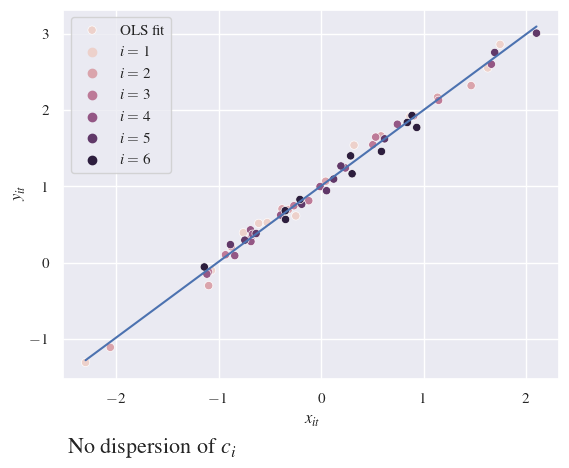

In [48]:
np.random.seed(1)
y,X,c,u = simulate_data(sigma_c=0,coef_cx=0.1)
ax=sns.scatterplot(y=y.flatten(),x=X[:,1],hue=ii); 
add_reg_line(y,X,ax)
ax.legend(['OLS fit'] + [f'$i={i+1}$' for i in range(N)]);
ax.set_xlabel('$x_{it}$'); 
ax.set_ylabel('$y_{it}$'); 
ax.annotate(r'No dispersion of $c_i$', 
    xy=(0.01, -0.2), 
    xycoords='axes fraction', 
    ha='left')
plt.savefig('ols_no_ind_effect_c.pdf')

## Rescale y axis

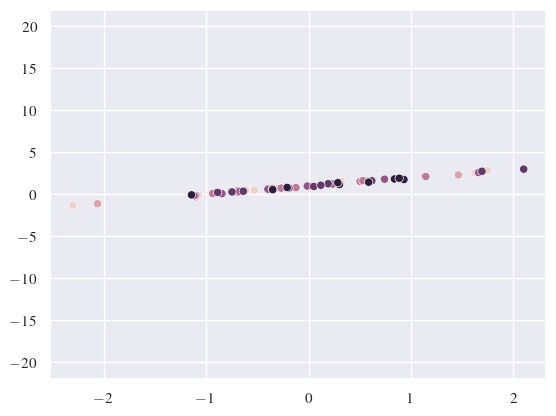

In [49]:
np.random.seed(1)
y,X,c,u = simulate_data(sigma_c=0,coef_cx=0.)
ax=sns.scatterplot(y=y.flatten(),x=X[:,1],hue=ii); 
ax.get_legend().set_visible(False);
ax.set_ylim([-22,22]);
plt.savefig('ols_tall.pdf')

# Pure RE: $E(x'c) = 0$

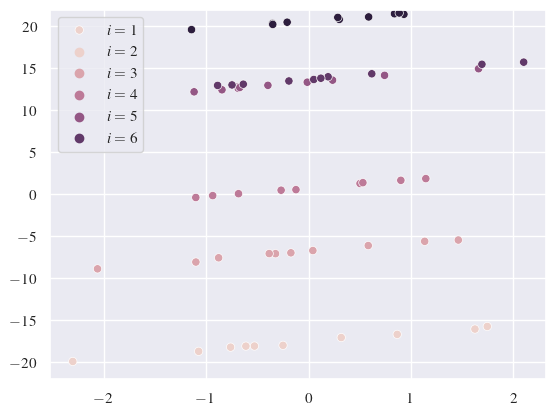

In [50]:
np.random.seed(1)
y,X,c,u = simulate_data(coef_cx=0.)
ax=sns.scatterplot(y=y.flatten(),x=X[:,1],hue=ii); 
ax.legend([f'$i={i+1}$' for i in range(N)]);
ax.set_ylim([-22,22]);

plt.savefig('re_raw.pdf')

## Add OLS line

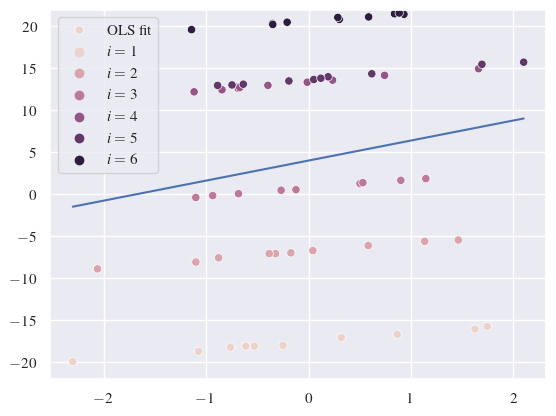

In [51]:
np.random.seed(1)
y,X,c,u = simulate_data(coef_cx=0.)
ax=sns.scatterplot(y=y.flatten(),x=X[:,1],hue=ii); 
add_reg_line(y,X,ax)
ax.legend(['OLS fit'] + [f'$i={i+1}$' for i in range(N)]);
ax.set_ylim([-22,22]);

plt.savefig('re_fit.pdf')

## Rescale x


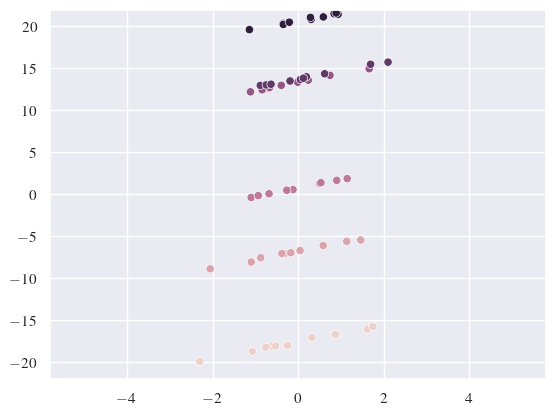

In [52]:
np.random.seed(1)
y,X,c,u = simulate_data(coef_cx=0.)
ax=sns.scatterplot(y=y.flatten(),x=X[:,1],hue=ii); 

ax.get_legend().set_visible(False);
ax.set_ylim([-22,22]);
ax.set_xlim([-5.8,5.8])
plt.savefig('re_wide.pdf')

# FE: $E(x'c) \ne 0$

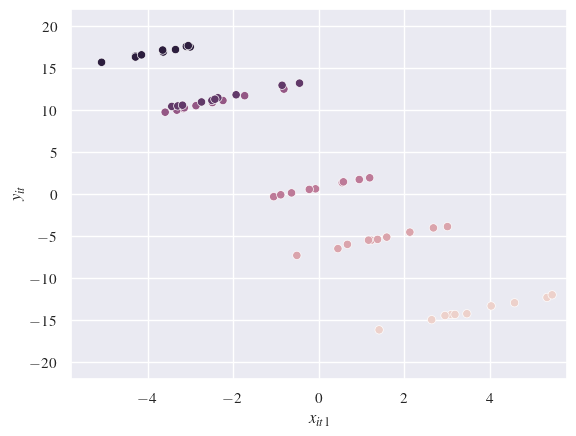

In [53]:
np.random.seed(1)
y,X,c,u = simulate_data(coef_cx=-.2)

ax=sns.scatterplot(y=y.flatten(),x=X[:,1],hue=ii);
ax.get_legend().set_visible(False);
ax.set_xlabel('$x_{it1}$'); 
ax.set_ylabel('$y_{it}$')
ax.set_ylim([-22,22]);
ax.set_xlim([-5.8,5.8])

plt.savefig('fe_raw.pdf')

## Add OLS line

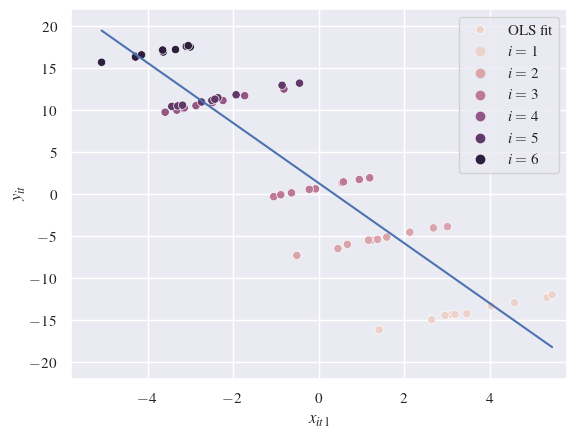

In [54]:
np.random.seed(1)
y,X,c,u = simulate_data(coef_cx=-.2)

ax=sns.scatterplot(y=y.flatten(),x=X[:,1],hue=ii);
ax.set_xlabel('$x_{it1}$'); 
ax.set_ylabel('$y_{it}$')
ax.set_ylim([-22,22]);
ax.set_xlim([-5.8,5.8])
add_reg_line(y,X,ax)
ax.legend(['OLS fit'] + [f'$i={i+1}$' for i in range(N)]);

plt.savefig('fe_fit.pdf')

## Demean $y$ and $x$

Due to the sorting where the individuals come in blocks, we can just reshape to $(N,T)$ and take the average over the second dimension, `axis=1`. 

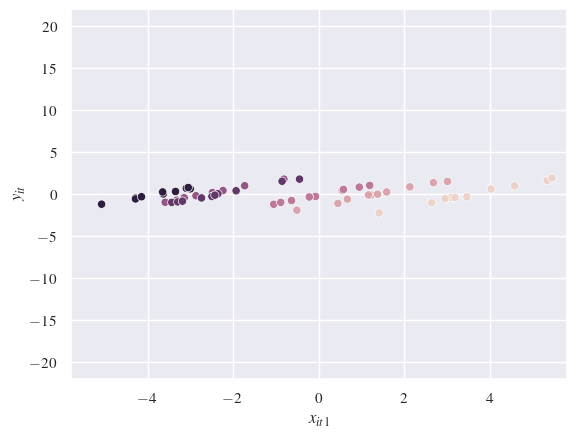

In [55]:
y_time_avg = y.reshape((N,T)).mean(1)
y[:,0] -= y_time_avg[ii]

ax=sns.scatterplot(y=y.flatten(),x=X[:,1],hue=ii);
ax.get_legend().set_visible(False);
ax.set_xlabel('$x_{it1}$'); 
ax.set_ylabel('$y_{it}$')
ax.set_ylim([-22,22]);
ax.set_xlim([-5.8,5.8])

plt.savefig('fe_y_demeaned.pdf')

## Zoom

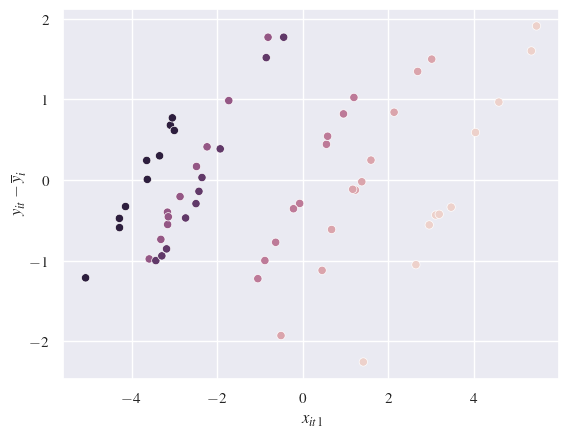

In [57]:
ax=sns.scatterplot(y=y.flatten(),x=X[:,1],hue=ii);
ax.get_legend().set_visible(False);
ax.set_xlabel('$x_{it1}$'); 
ax.set_ylabel('$y_{it} - \overline{y}_i$')

plt.savefig('fe_y_demeaned_narrow.pdf')

## Demean both, add OLS 

In [16]:
# demeaning 

X_time_avg = X[:,1].reshape((N,T)).mean(1)
X[:, 1] -= X_time_avg[ii]

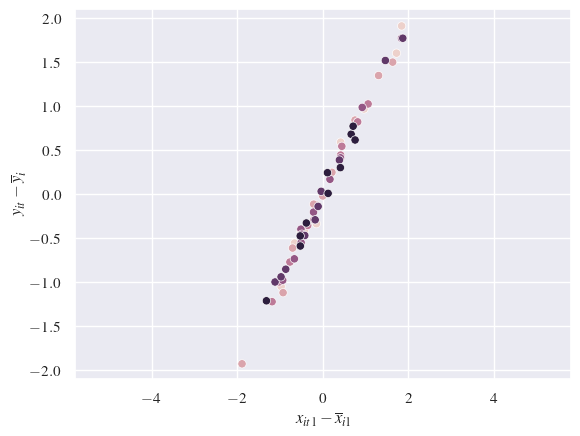

In [17]:
ax=sns.scatterplot(y=y.flatten(),x=X[:,1],hue=ii);
ax.set_xlabel('$x_{it1} - \overline{x}_{i1}$'); 
ax.set_ylabel('$y_{it} - \overline{y}_{i}$');
ax.get_legend().set_visible(False);
ax.set_xlim([-5.8,5.8])
ax.set_ylim([-2.1,2.1])

plt.savefig('fe_both_demeaned_wide.pdf');

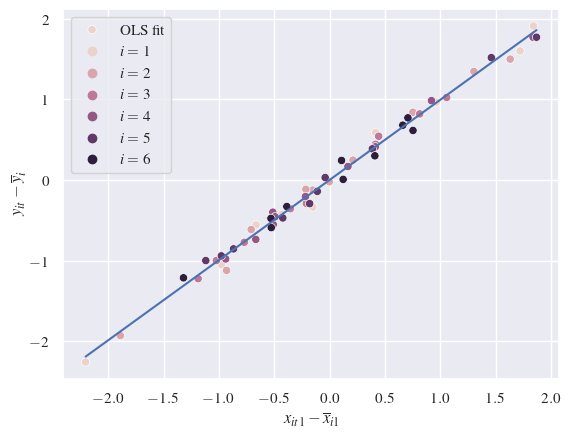

In [18]:
ax=sns.scatterplot(y=y.flatten(),x=X[:,1],hue=ii);
ax.set_xlabel('$x_{it1} - \overline{x}_{i1}$'); 
ax.set_ylabel('$y_{it} - \overline{y}_{i}$');

add_reg_line(y,X,ax)
ax.legend(['OLS fit'] + [f'$i={i+1}$' for i in range(N)]);

plt.savefig('fe_both_demeaned.pdf');